## Initial Data Import

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [183]:
df = pd.read_excel(r"C:\Users\miaox\Desktop\Coding\DATA1030-Fall2024\Independant Project\sheffield_wildfire_and_climate .xlsx")

In [184]:
print(df.shape)

(537, 8)


In [185]:
print (df.columns)

Index(['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days',
       'totalrain_mm', 'totalsun_hours', 'wildfire_quantity'],
      dtype='object')


In [186]:
print(df.dtypes.to_frame(name='Data Type'))

                  Data Type
year                  int64
month                 int64
tmax_degC           float64
tmin_degC           float64
airfrost_days         int64
totalrain_mm        float64
totalsun_hours      float64
wildfire_quantity     int64


In [187]:
print(df.describe(include='all'))

              year       month   tmax_degC   tmin_degC  airfrost_days  \
count   537.000000  537.000000  537.000000  537.000000     537.000000   
mean   1998.122905    6.525140   13.458845    6.690689       2.573557   
std      12.930634    3.447882    5.418308    4.075769       4.408130   
min    1976.000000    1.000000    1.000000   -3.000000       0.000000   
25%    1987.000000    4.000000    8.900000    3.400000       0.000000   
50%    1998.000000    7.000000   13.200000    6.100000       0.000000   
75%    2009.000000   10.000000   18.400000   10.400000       3.000000   
max    2020.000000   12.000000   25.600000   14.500000      25.000000   

       totalrain_mm  totalsun_hours  wildfire_quantity  
count    537.000000      537.000000         537.000000  
mean      69.839665      119.700559           0.417132  
std       41.721892       62.933924           1.234276  
min        4.600000        5.800000           0.000000  
25%       41.200000       60.300000           0.000000  


## EDA

## Climate

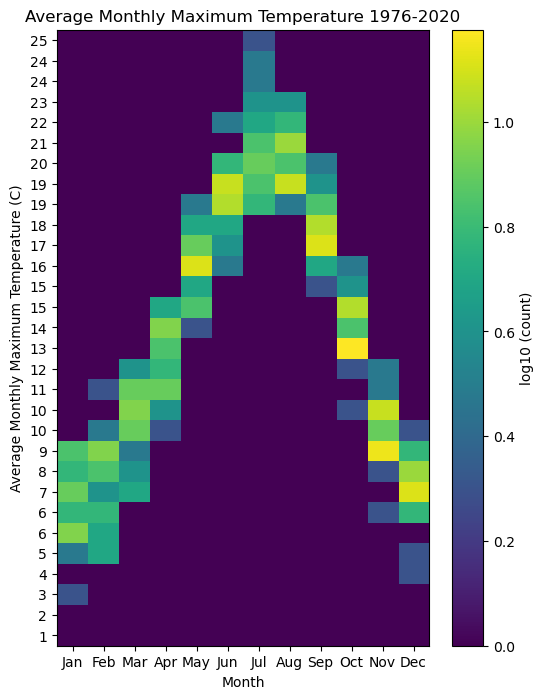

 Figure: Log10 count of average monthly maximum temperature for each 
 month across the timeseries dataset from 1976-2020


In [188]:
nbins_y = 30

heatmap, xedges, yedges = np.histogram2d(df['month'], df['tmax_degC'], bins=[12, nbins_y])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(6,8))

plt.imshow(np.log10(heatmap).T, origin='lower',extent=extent, vmin=0, aspect='auto') # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('Month')
plt.ylabel('Average Monthly Maximum Temperature (C)')
plt.xticks(ticks=(xedges[:-1] + xedges[1:]) / 2, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

def round_to_1sf(x, whole_numbers=False):
    x = np.asarray(x)  # Ensure x is an array
    rounded = np.zeros_like(x)  # Create an array to hold rounded values
    for i in range(len(x)):
        if x[i] == 0:
            rounded[i] = 0
        else:
            if whole_numbers:
                rounded[i] = int(np.round(x[i]))  # Round to nearest whole number and convert to int
            else:
                rounded[i] = np.round(x[i], 1 - int(np.floor(np.log10(np.abs(x[i])))))
    return rounded

# Set y-ticks using midpoints of yedges and round to 1 significant figure
y_tick_values = (yedges[:-1] + yedges[1:]) / 2
plt.yticks(ticks=y_tick_values, labels=round_to_1sf(y_tick_values, whole_numbers=True).astype(int))
plt.title('Average Monthly Maximum Temperature 1976-2020')
plt.colorbar(label='log10 (count)', cmap="plasma")
plt.show()

print(' Figure: Log10 count of average monthly maximum temperature for each ') 
print(' month across the timeseries dataset from 1976-2020')


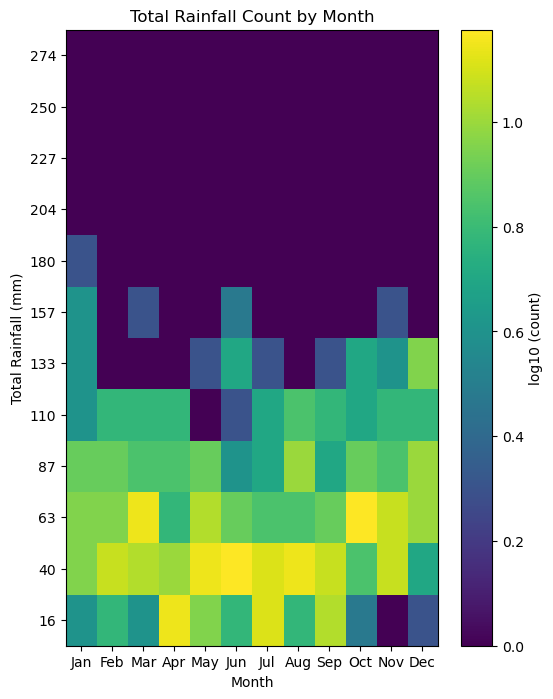

 Figure: Log10 count of total rainfall (mm) for each month across the 
 timeseries dataset from 1976-2020


In [189]:
nbins = 12

heatmap, xedges, yedges = np.histogram2d(df['month'], df['totalrain_mm'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(6,8))

plt.imshow(np.log10(heatmap).T, origin='lower',extent=extent, vmin=0, aspect='auto') # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(ticks=(xedges[:-1] + xedges[1:]) / 2, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

def round_to_1sf(x, whole_numbers=False):
    x = np.asarray(x)  # Ensure x is an array
    rounded = np.zeros_like(x)  # Create an array to hold rounded values
    for i in range(len(x)):
        if x[i] == 0:
            rounded[i] = 0
        else:
            if whole_numbers:
                rounded[i] = int(np.round(x[i]))  # Round to nearest whole number and convert to int
            else:
                rounded[i] = np.round(x[i], 1 - int(np.floor(np.log10(np.abs(x[i])))))
    return rounded

# Set y-ticks using midpoints of yedges and round to 1 significant figure
y_tick_values = (yedges[:-1] + yedges[1:]) / 2
plt.yticks(ticks=y_tick_values, labels=round_to_1sf(y_tick_values, whole_numbers=True).astype(int))
plt.title('Total Rainfall Count by Month')
plt.colorbar(label='log10 (count)', cmap="plasma")
plt.show()

print(' Figure: Log10 count of total rainfall (mm) for each month across the ') 
print(' timeseries dataset from 1976-2020')

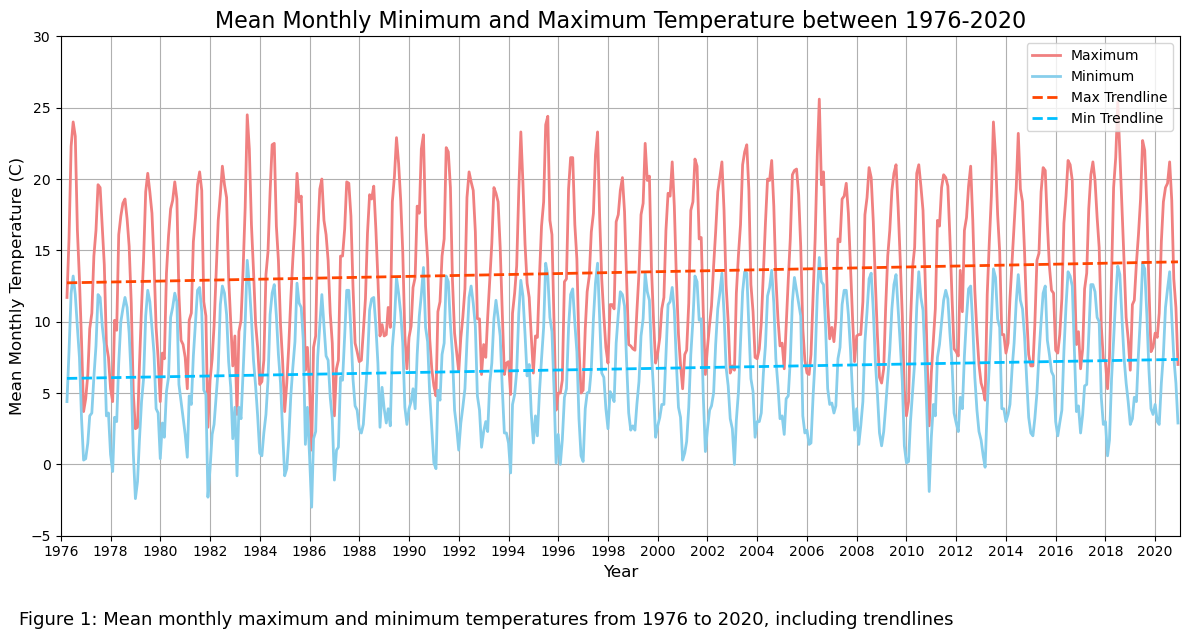

In [190]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.transforms import ScaledTranslation

# Fix 'year_month' format to "YYYY-MM" using string formatting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].apply(lambda x: f'{x:02}')

# Convert to datetime
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')

x = df['year_month']  # X-axis: datetime representation of 'year_month'
y1 = df['tmax_degC']  # Y-axis 1: 'totalrain_mm'
y2 = df['tmin_degC']  # Y-axis 2: 'totalrain_mm_avg4'

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the first line
plt.plot(x, y1, color='lightcoral', label='Maximum', linewidth=2)
# Plot the second line
plt.plot(x, y2, color='skyblue', label='Minimum', linewidth=2)

x_as_int = x.astype(np.int64)  # Convert datetime to int64 (nanoseconds since epoch)

# Linear fit for Maximum temperature
z1 = np.polyfit(x_as_int, y1, 1)
p1 = np.polyval(z1, x_as_int)  # Calculate trendline values for Maximum temperature

# Linear fit for Minimum temperature
z2 = np.polyfit(x_as_int, y2, 1)
p2 = np.polyval(z2, x_as_int)  # Calculate trendline values for Minimum temperature

# Plot trendlines
plt.plot(x, p1, color='orangered', linestyle='--', linewidth=2, label='Max Trendline')
plt.plot(x, p2, color='deepskyblue', linestyle='--', linewidth=2, label='Min Trendline')

# Set the x-ticks to display only the years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Set major ticks to years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as 'YYYY'

# Add limits to the x-axis
plt.xlim(pd.Timestamp('1976-01-01'), pd.Timestamp('2020-12-31'))
plt.ylim(-5,30)

# Adding labels, title, and legend
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Monthly Temperature (C)', fontsize=12)
plt.title('Mean Monthly Minimum and Maximum Temperature between 1976-2020', fontsize=16)
plt.legend()
plt.grid(True)

# Format the x-axis labels for better visibility
offset = ScaledTranslation(0/72, 0, plt.gcf().dpi_scale_trans)  # Adjust 10/72 as needed
for label in plt.gca().get_xticklabels():
    label.set_transform(label.get_transform() + offset)

plt.figtext(0.02, -0.05, 'Figure 1: Mean monthly maximum and minimum temperatures from 1976 to 2020, including trendlines',
            wrap=True, fontsize=13)

# Display the plot
plt.tight_layout()
plt.show()

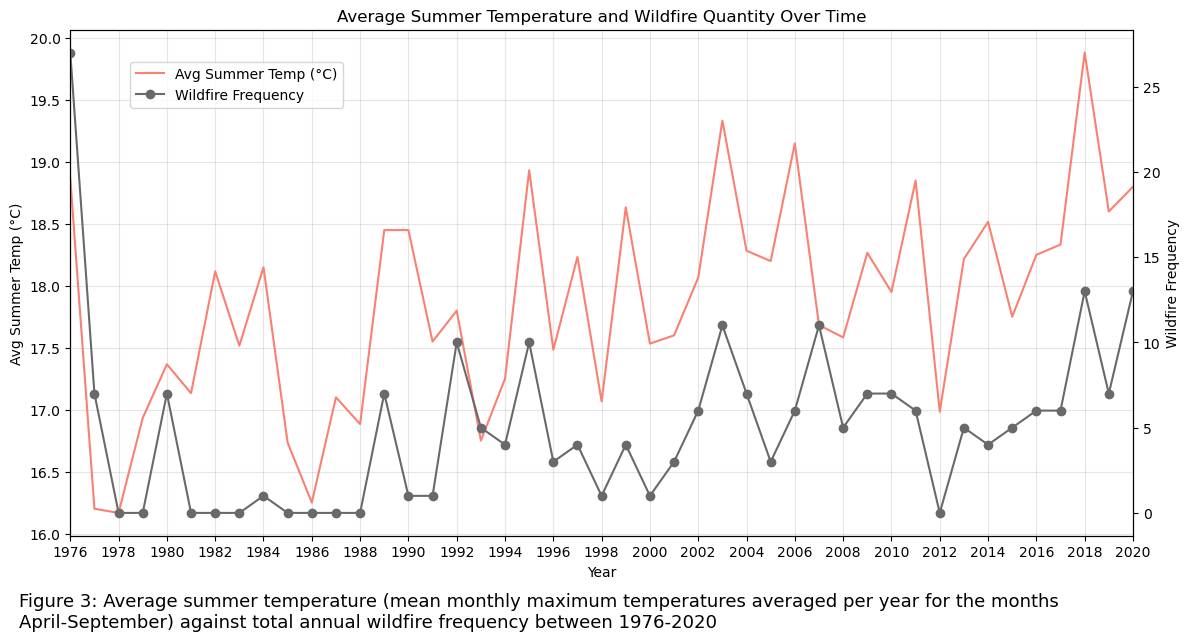

In [191]:
# Combine year and month into a single datetime column

df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

summer_df = df[df['month'].isin([4, 5, 6, 7, 8, 9])]

average_summer_temp = summer_df.groupby('year')['tmax_degC'].mean().reset_index()
average_summer_temp.columns = ['year', 'avg_summer_temp_degC']

# Merge the new average summer temperature data with the original DataFrame, specifying suffixes
df = df.merge(average_summer_temp, on='year', suffixes=('', '_avg_summer'))

# Now, plot the wildfire quantity and average summer temperature over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot avg_summer_temp_degC on the left y-axis
line1, = ax1.plot(average_summer_temp['year'], average_summer_temp['avg_summer_temp_degC'], label='Avg Summer Temp (°C)', color='salmon')
ax1.set_ylabel('Avg Summer Temp (°C)')
ax1.tick_params(axis='y')

# Create a second y-axis for wildfire quantity
ax2 = ax1.twinx()
line2, = ax2.plot(df['year'].unique(), df.groupby('year')['wildfire_quantity'].sum(), label='Wildfire Frequency', color='dimgray', marker='o')
ax2.set_ylabel('Wildfire Frequency')
ax2.tick_params(axis='y')

ax1.set_xlabel('Year')

# Adding labels and title
plt.title('Average Summer Temperature and Wildfire Quantity Over Time')
ax1.grid(color='grey', alpha=0.2)

# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 0.95))

# Show the plot
plt.xticks(np.arange(1976, 2021, 2), rotation=45)
plt.xlim(1976,2020)
plt.xlabel('Year')

plt.figtext(0.02, -0.05, 'Figure 3: Average summer temperature (mean monthly maximum temperatures averaged per year for the months April-September) against total annual wildfire frequency between 1976-2020',
            wrap=True, fontsize=13)

plt.tight_layout()
plt.show()


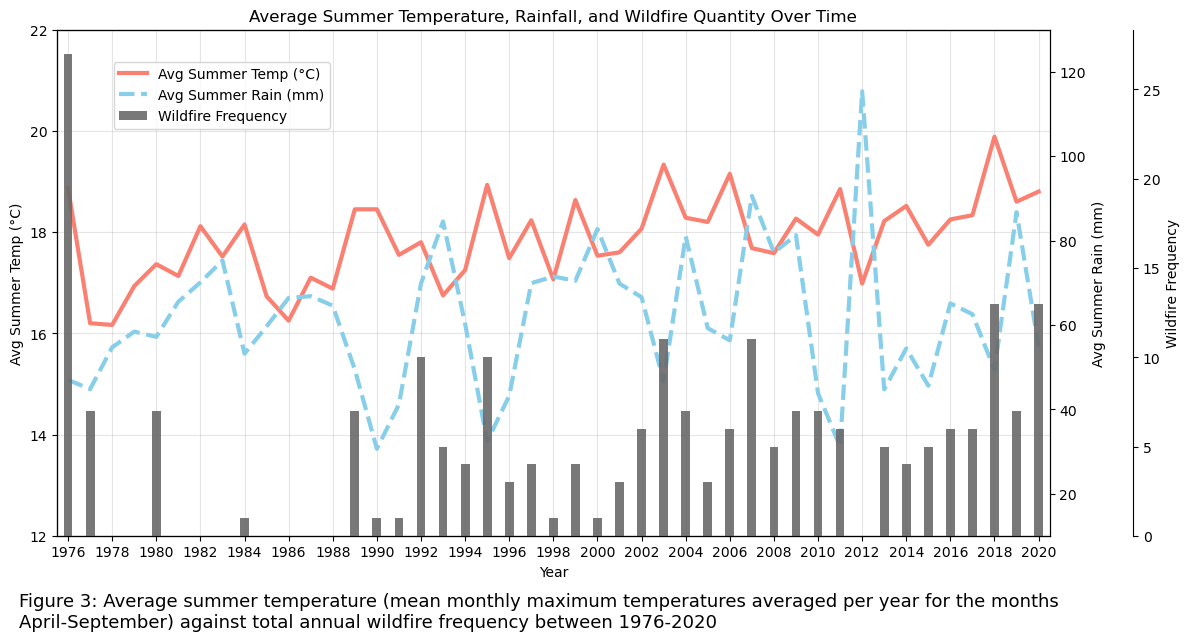

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame creation
# Replace this part with your actual DataFrame loading logic
# Assuming df already exists with 'year', 'month', 'tmax_degC', 'totalrain_mm', and 'wildfire_quantity'

# Combine year and month into a single datetime column
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Filter for summer months (April to September)
summer_df = df[df['month'].isin([4, 5, 6, 7, 8, 9])]

# Calculate average summer temperature and rainfall
average_summer_temp = summer_df.groupby('year')['tmax_degC'].mean().reset_index()
average_summer_temp.columns = ['year', 'avg_summer_temp_degC']

average_summer_rain = summer_df.groupby('year')['totalrain_mm'].mean().reset_index()
average_summer_rain.columns = ['year', 'avg_summer_rain_mm']

# Merge average summer temperature data with the original DataFrame
df = df.merge(average_summer_temp, on='year', suffixes=('', '_avg_summer'))

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot avg_summer_temp_degC on the left y-axis
line1, = ax1.plot(average_summer_temp['year'], average_summer_temp['avg_summer_temp_degC'], label='Avg Summer Temp (°C)', color='salmon', linewidth=3)
ax1.set_ylabel('Avg Summer Temp (°C)')
ax1.tick_params(axis='y')
ax1.set_ylim(12, 22)  # Set the y-axis limits for average summer temperature

# Create a second y-axis for rainfall
ax2 = ax1.twinx()
line2, = ax2.plot(average_summer_rain['year'], average_summer_rain['avg_summer_rain_mm'], label='Avg Summer Rain (mm)', color='skyblue', linewidth=3, linestyle='--')
ax2.set_ylabel('Avg Summer Rain (mm)')
ax2.tick_params(axis='y')
ax2.set_ylim(10, 130)  # Set the y-axis limits for average summer rainfall

# Create a third y-axis for wildfire frequency on the left
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the right spine outward

# Bar plot for wildfire frequency
bar_width = 0.4  # Adjust the width of the bars
x_positions = df['year'].unique()  # x positions for the bars
wildfire_frequencies = df.groupby('year')['wildfire_quantity'].sum()  # Summing wildfire frequencies per year
bars = ax3.bar(x_positions, wildfire_frequencies, width=bar_width, color='dimgray', alpha=0.9, label='Wildfire Frequency')

ax3.set_ylabel('Wildfire Frequency')
ax3.tick_params(axis='y')

# Set the x-axis label
ax1.set_xlabel('Year')

# Adding labels and title
plt.title('Average Summer Temperature, Rainfall, and Wildfire Quantity Over Time')
ax1.grid(color='grey', alpha=0.2)

# Combine legends for temperature, rainfall, and wildfire frequency
lines = [line1, line2]
labels = [line.get_label() for line in lines]
bars_label = bars.get_label()

# Add the bar label and combine with the lines
lines.append(bars)
labels.append(bars_label)

# Add a single legend combining all elements
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0.05, 0.95))

# Set the x-axis limits and ticks
plt.xticks(np.arange(1976, 2021, 2), rotation=45)
plt.xlim(1975.5, 2020.5)

# Add a caption
plt.figtext(0.02, -0.05, 'Figure 3: Average summer temperature (mean monthly maximum temperatures averaged per year for the months April-September) against total annual wildfire frequency between 1976-2020',
            wrap=True, fontsize=13)

plt.tight_layout()
plt.show()


In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation
# Assuming the DataFrame 'df' already exists and contains the relevant columns:
# 'avg_summer_temp_degC', 'avg_summer_rain_mm', 'wildfire_quantity'

# Group data to get total wildfire frequency per year
wildfire_frequencies = df.groupby('year')['wildfire_quantity'].sum().reset_index()
wildfire_frequencies.columns = ['year', 'wildfire_frequency']

# Merge average summer temperature, rainfall, and wildfire frequency data
merged_df = average_summer_temp.merge(average_summer_rain, on='year').merge(wildfire_frequencies, on='year')

# Calculate the Spearman correlation matrix
correlation_matrix = merged_df[['avg_summer_temp_degC', 'avg_summer_rain_mm', 'wildfire_frequency']].corr(method='spearman')

# Plot the correlation matrix as a heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#plt.title('Spearman Correlation Matrix for Average Summer Temperature, Rainfall, and Wildfire Frequency')
#plt.show()


In [194]:
from scipy.stats import spearmanr
import pandas as pd

# Extract the three variables of interest
variables = merged_df[['avg_summer_temp_degC', 'avg_summer_rain_mm', 'wildfire_frequency']]

# Create a list to store individual DataFrames
correlation_results_list = []

# Iterate through each pair of variables to calculate Spearman correlation and p-value
for i in range(variables.shape[1]):
    for j in range(i + 1, variables.shape[1]):
        var1 = variables.columns[i]
        var2 = variables.columns[j]
        corr, p_value = spearmanr(variables[var1], variables[var2])
        # Create a DataFrame for the current pair of results
        result_df = pd.DataFrame({
            'Variable 1': [var1],
            'Variable 2': [var2],
            'Spearman Correlation': [corr],
            'p-value': [p_value]
        })
        # Add the current DataFrame to the list
        correlation_results_list.append(result_df)

# Concatenate all results into a single DataFrame
correlation_results = pd.concat(correlation_results_list, ignore_index=True)

# Display the results
print(correlation_results)

# Optionally, filter out statistically significant results (p < 0.05)
significant_results = correlation_results[correlation_results['p-value'] < 0.05]
print("\nStatistically significant correlations (p < 0.05):")
print(significant_results)


             Variable 1          Variable 2  Spearman Correlation   p-value
0  avg_summer_temp_degC  avg_summer_rain_mm             -0.270892  0.071880
1  avg_summer_temp_degC  wildfire_frequency              0.640447  0.000002
2    avg_summer_rain_mm  wildfire_frequency             -0.182238  0.230858

Statistically significant correlations (p < 0.05):
             Variable 1          Variable 2  Spearman Correlation   p-value
1  avg_summer_temp_degC  wildfire_frequency              0.640447  0.000002


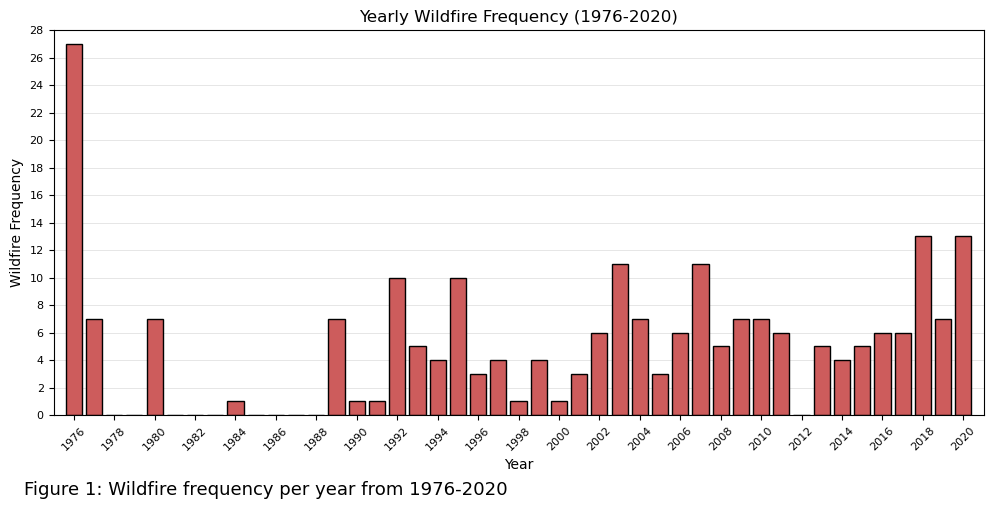

In [195]:
import matplotlib.pyplot as plt
import numpy as np
# Assuming your DataFrame is named df and it has a column 'year' for the year of each wildfire
wildfire_per_year = df.groupby('year')['wildfire_quantity'].sum().reset_index()

# Rename the columns for clarity
wildfire_per_year.columns = ['Year', 'Wildfire Count']

# Create a bar plot using the 'wildfire_per_year' DataFrame
plt.figure(figsize=(12, 5), dpi=100)
plt.bar(wildfire_per_year['Year'], wildfire_per_year['Wildfire Count'], color='indianred', edgecolor='black', zorder=2)

plt.xlabel('Year')
plt.ylabel('Wildfire Frequency')
plt.title('Yearly Wildfire Frequency (1976-2020)')

# Set x-ticks at intervals of 2 years
plt.xticks(np.arange(min(wildfire_per_year['Year']), max(wildfire_per_year['Year']) + 1, 2), rotation=45, fontsize=8)
# Set y-ticks based on the total wildfire quantity
plt.yticks(np.arange(0, 31, 2), fontsize=8)
plt.xlim(1975, 2021)
plt.ylim(0, 28)

plt.grid(axis='y', color='gray', linewidth=0.7, alpha=0.2, zorder=0)

# Add a caption
plt.figtext(0.1, -0.05, 'Figure 1: Wildfire frequency per year from 1976-2020',
            wrap=True, fontsize=13)

plt.show()

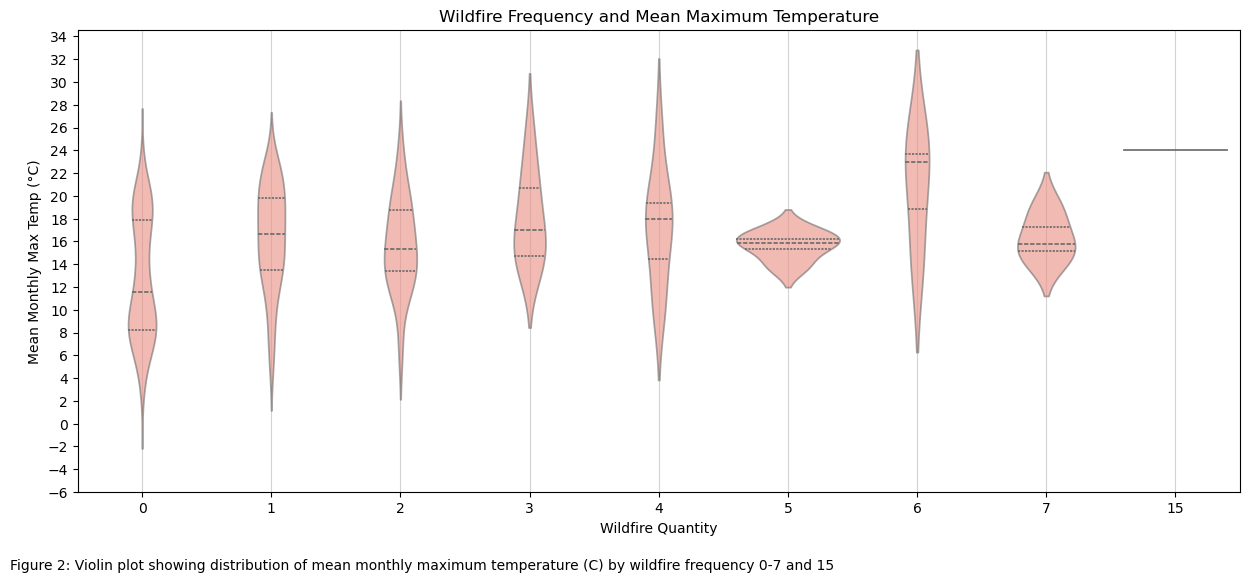

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where wildfire_quantity is between 0 and 1 or equal to 15
filtered_df = df[(df['wildfire_quantity'] >= 0) & (df['wildfire_quantity'] <= 7) | (df['wildfire_quantity'] == 15)]

# Create the violin plot
plt.figure(figsize=(15, 6))
sns.violinplot(
    x='wildfire_quantity', 
    y='tmax_degC', 
    data=filtered_df, 
    inner='quartile', 
    color='salmon', 
    alpha=0.6,
    zorder=2,
)

plt.yticks(np.arange(-6, 35, 2))
plt.grid(True, color='lightgray', zorder=0)
plt.grid(axis='y')

# Adding labels and title
plt.xlabel('Wildfire Quantity')
plt.ylabel('Mean Monthly Max Temp (°C)')
plt.title('Wildfire Frequency and Mean Maximum Temperature')

plt.figtext(0.08, -0.02, 'Figure 2: Violin plot showing distribution of mean monthly maximum temperature (C) by wildfire frequency 0-7 and 15')

# Show the plot
plt.show()


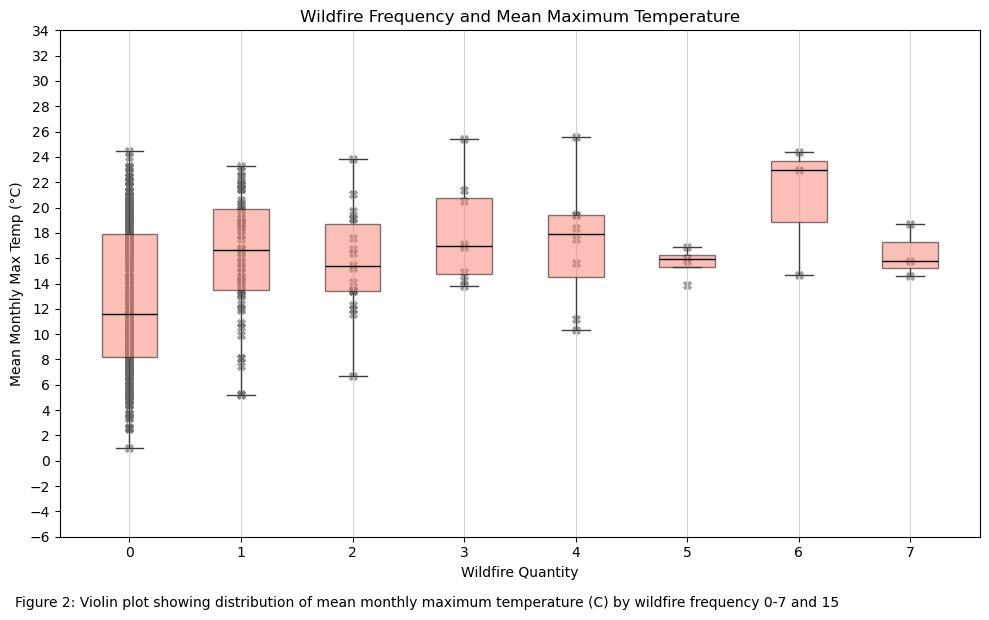

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame to include rows where wildfire_quantity is between 0 and 7 or equal to 15
filtered_df = df[(df['wildfire_quantity'] >= 0) & (df['wildfire_quantity'] <= 7)]

# Create the figure
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(
    x='wildfire_quantity', 
    y='tmax_degC', 
    data=filtered_df, 
    boxprops=dict(facecolor='salmon', edgecolor='black', alpha=0.5),  # Set box color and outline
    medianprops=dict(color='black'),  
    width=0.5,  # Adjust the width for better visibility
    zorder=3,
    showfliers=False  # Disable the display of outliers
)

# Create the scatter plot
sns.scatterplot(
    x='wildfire_quantity', 
    y='tmax_degC', 
    data=filtered_df, 
    color='dimgray', 
    alpha=0.6, 
    zorder=1,
    marker='X',
    edgecolor=None,
)

# Set the y-ticks and grid lines
plt.yticks(np.arange(-6, 35, 2))
plt.grid(True, color='lightgray', zorder=0)
plt.grid(axis='y')

# Adding labels and title
plt.xlabel('Wildfire Quantity')
plt.ylabel('Mean Monthly Max Temp (°C)')
plt.title('Wildfire Frequency and Mean Maximum Temperature')

plt.figtext(0.02, -0.02, 'Figure 2: Violin plot showing distribution of mean monthly maximum temperature (C) by wildfire frequency 0-7 and 15')

# Show the plot
plt.tight_layout()
plt.show()


### Feature Creation

In [ ]:
#re-read dataset
df = pd.read_excel(r"C:\Users\miaox\Desktop\Coding\DATA1030-Fall2024\Independant Project\sheffield_wildfire_and_climate .xlsx")

In [273]:
df['year_squared'] = df['year'] ** 2

In [274]:
#4-month Rolling average for mean maximum temperature and total rainfall
#Lag for average of 4 months to represent a season rather than a lag by 1 month 

#Creating a lag feature for tmax_degC and totalrain_mm
df['totalrain_mm_avg4'] = df['totalrain_mm'].rolling(window=4, min_periods=1).mean()
df['tmax_degC_avg4'] = df['tmax_degC'].rolling(window=4, min_periods=1).mean()

# Display the original and the calculated rolling average columns for verification
print("Original 'totalrain_mm' values:")
print(df['totalrain_mm'].head(10))  # Displaying first 10 rows for context

print("\nCalculated 'totalrain_mm_avg4' (4-month rolling average):")
print(df['totalrain_mm_avg4'].head(10))

print("\nOriginal 'tmax_degC' values:")
print(df['tmax_degC'].head(10))

print("\nCalculated 'tmax_degC_avg4' (4-month rolling average):")
print(df['tmax_degC_avg4'].head(10))

#this removes NaN values from the first 4 months of the dataset
#df = df.dropna()

Original 'totalrain_mm' values:
0     16.2
1     79.9
2     16.6
3     16.9
4     17.3
5    134.9
6    127.7
7     32.4
8     75.3
9    113.8
Name: totalrain_mm, dtype: float64

Calculated 'totalrain_mm_avg4' (4-month rolling average):
0    16.200000
1    48.050000
2    37.566667
3    32.400000
4    32.675000
5    46.425000
6    74.200000
7    78.075000
8    92.575000
9    87.300000
Name: totalrain_mm_avg4, dtype: float64

Original 'tmax_degC' values:
0    11.7
1    15.8
2    22.3
3    24.0
4    23.0
5    16.4
6    13.0
7     8.6
8     3.7
9     4.6
Name: tmax_degC, dtype: float64

Calculated 'tmax_degC_avg4' (4-month rolling average):
0    11.700
1    13.750
2    16.600
3    18.450
4    21.275
5    21.425
6    19.100
7    15.250
8    10.425
9     7.475
Name: tmax_degC_avg4, dtype: float64


In [275]:
# Combine year and month into a single datetime column
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Filter for summer months (April to September)
summer_df = df[df['month'].isin([4, 5, 6, 7, 8, 9])]

# Calculate average summer temperature and rainfall
average_summer_temp = summer_df.groupby('year')['tmax_degC'].mean().reset_index()
average_summer_temp.columns = ['year', 'avg_summer_temp_degC']

average_summer_rain = summer_df.groupby('year')['totalrain_mm'].mean().reset_index()
average_summer_rain.columns = ['year', 'avg_summer_rain_mm']

# Merge average summer temperature data with the original DataFrame
df = df.merge(average_summer_temp, on='year', suffixes=('', '_avg_summer'))
df = df.merge(average_summer_rain, on='year', suffixes=('', '_avg_summer'))

In [276]:
df['year_month'] = df['year'].astype(str) + '_' + df['month'].astype(str).str.zfill(2)

In [277]:
# Convert 'year_month' to datetime and extract 'year' and 'month' features
df['year_month_dt'] = pd.to_datetime(df['year_month'], format='%Y_%m')
df['year'] = df['year_month_dt'].dt.year
df['month'] = df['year_month_dt'].dt.month

# Create month_sin and month_cos features
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Print the column list to verify the presence of 'year_month' and other features
print("Columns:")
print(df.columns.tolist())  

Columns:
['year', 'month', 'tmax_degC', 'tmin_degC', 'airfrost_days', 'totalrain_mm', 'totalsun_hours', 'wildfire_quantity', 'totalrain_mm_avg4', 'tmax_degC_avg4', 'date', 'avg_summer_temp_degC', 'avg_summer_rain_mm', 'year_month', 'year_month_dt', 'month_sin', 'month_cos', 'year_squared', 'avg_summer_temp_degC_avg_summer', 'avg_summer_rain_mm_avg_summer']


### Feature Selection

In [278]:
print(df.head())

   year  month  tmax_degC  tmin_degC  airfrost_days  totalrain_mm  \
0  1976      4       11.7        4.4              2          16.2   
1  1976      5       15.8        7.9              0          79.9   
2  1976      6       22.3       12.0              0          16.6   
3  1976      7       24.0       13.2              0          16.9   
4  1976      8       23.0       11.9              0          17.3   

   totalsun_hours  wildfire_quantity  totalrain_mm_avg4  tmax_degC_avg4  \
0           116.1                  0          16.200000          11.700   
1           148.6                  5          48.050000          13.750   
2           250.2                  1          37.566667          16.600   
3           285.2                 15          32.400000          18.450   
4           215.6                  6          32.675000          21.275   

        date  avg_summer_temp_degC  avg_summer_rain_mm year_month  \
0 1976-04-01             18.866667           46.966667    1976_04

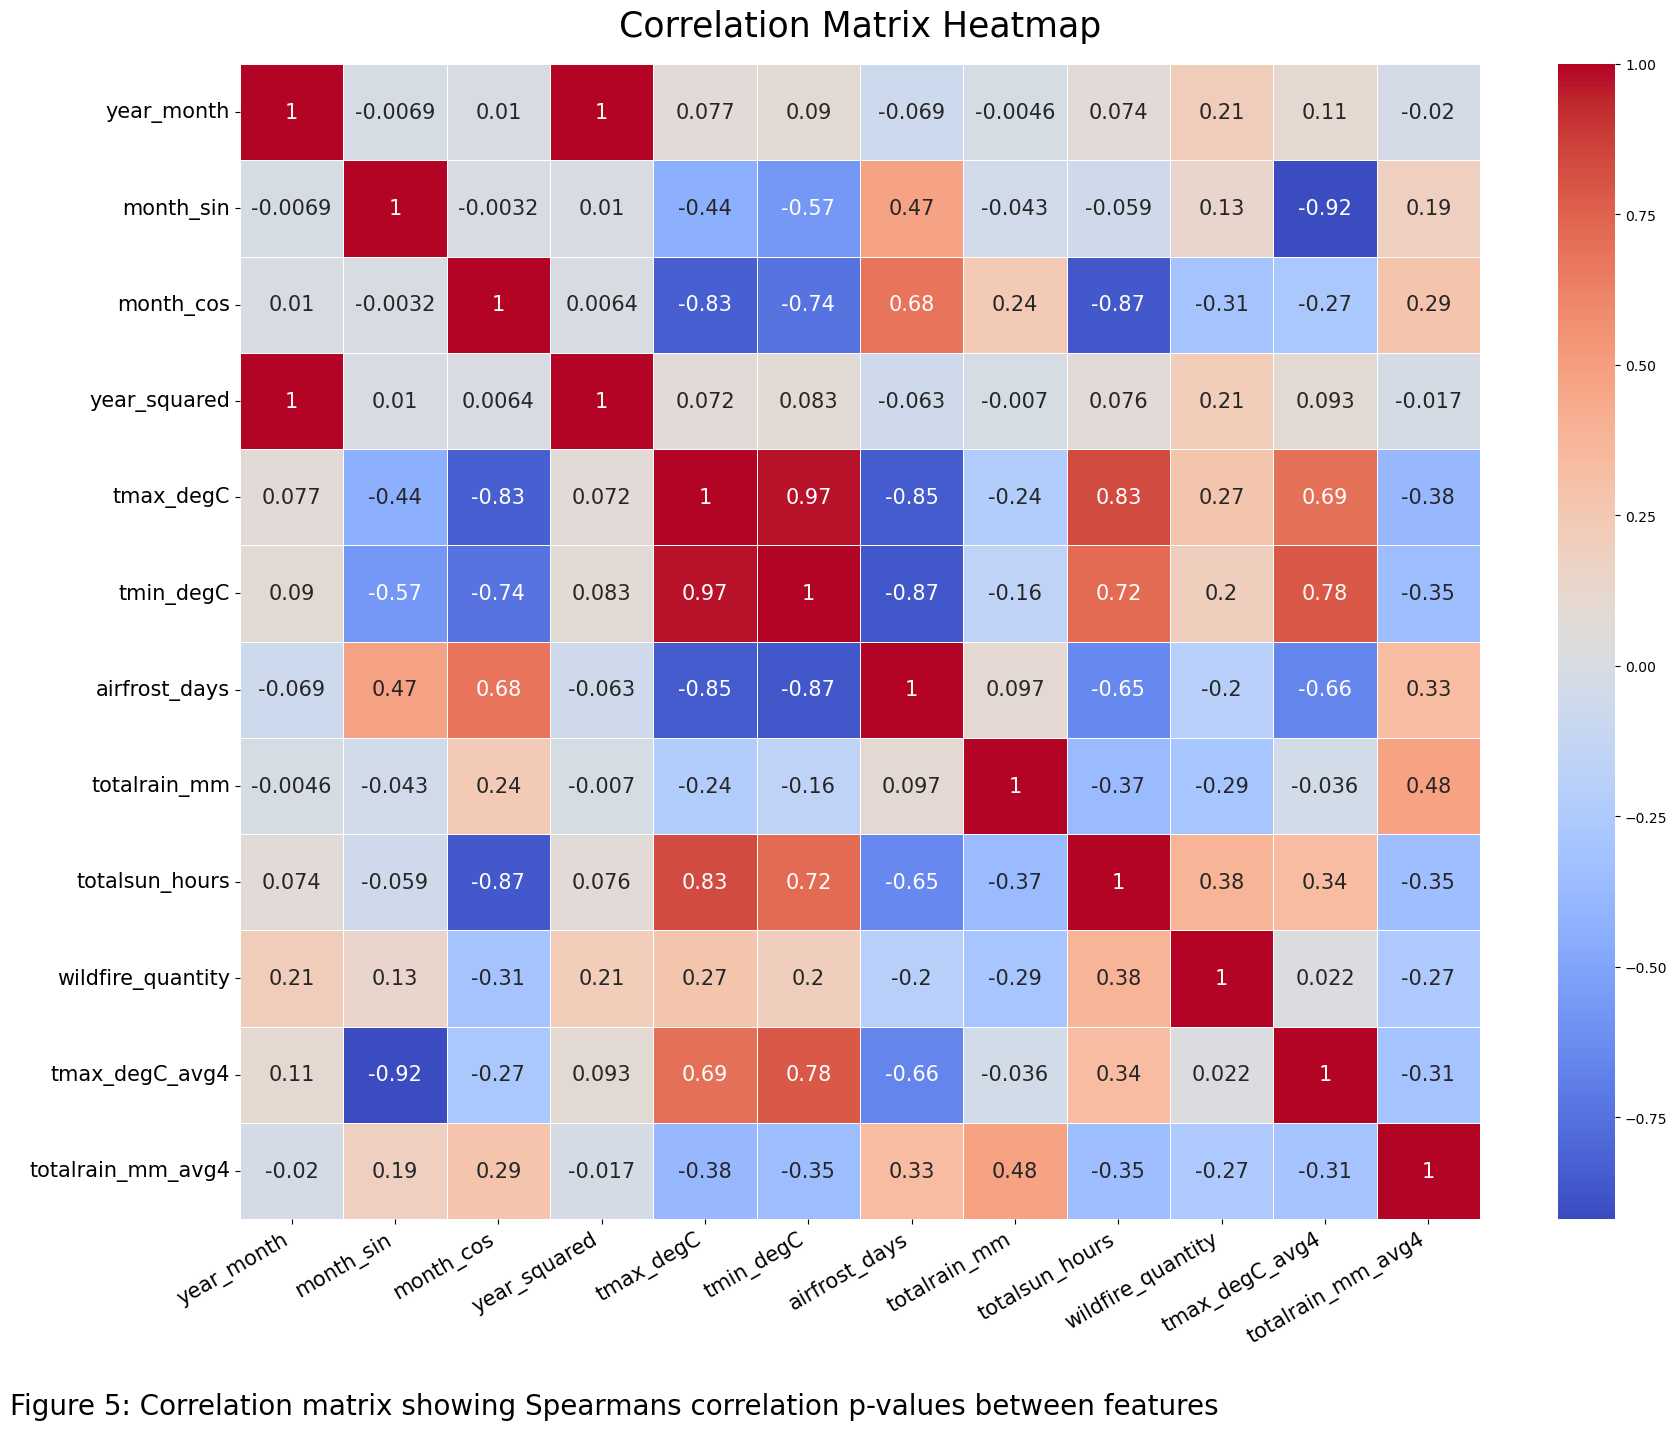

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_correlate = ['year_month', 'month_sin', 'month_cos', 'year_squared',
                        'tmax_degC', 'tmin_degC', 
                         'airfrost_days', 'totalrain_mm', 
                         'totalsun_hours', 'wildfire_quantity', 
                        'tmax_degC_avg4', 'totalrain_mm_avg4']

# Calculate the correlation matrix for the specified columns
corr_matrix = df[columns_to_correlate].corr(method='spearman')

# Display the correlation matrix
#print(corr_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 15})
plt.title('Correlation Matrix Heatmap', size=25, pad=20)

# Adjusting the x-tick labels
plt.xticks(size=15, ha='right', rotation=30)  # Slight rotation for readability
plt.yticks(size=15, rotation=0)

plt.figtext(0.01, -0.02, 'Figure 5: Correlation matrix showing Spearmans correlation p-values between features', size=20)

# Show the plot
plt.show()

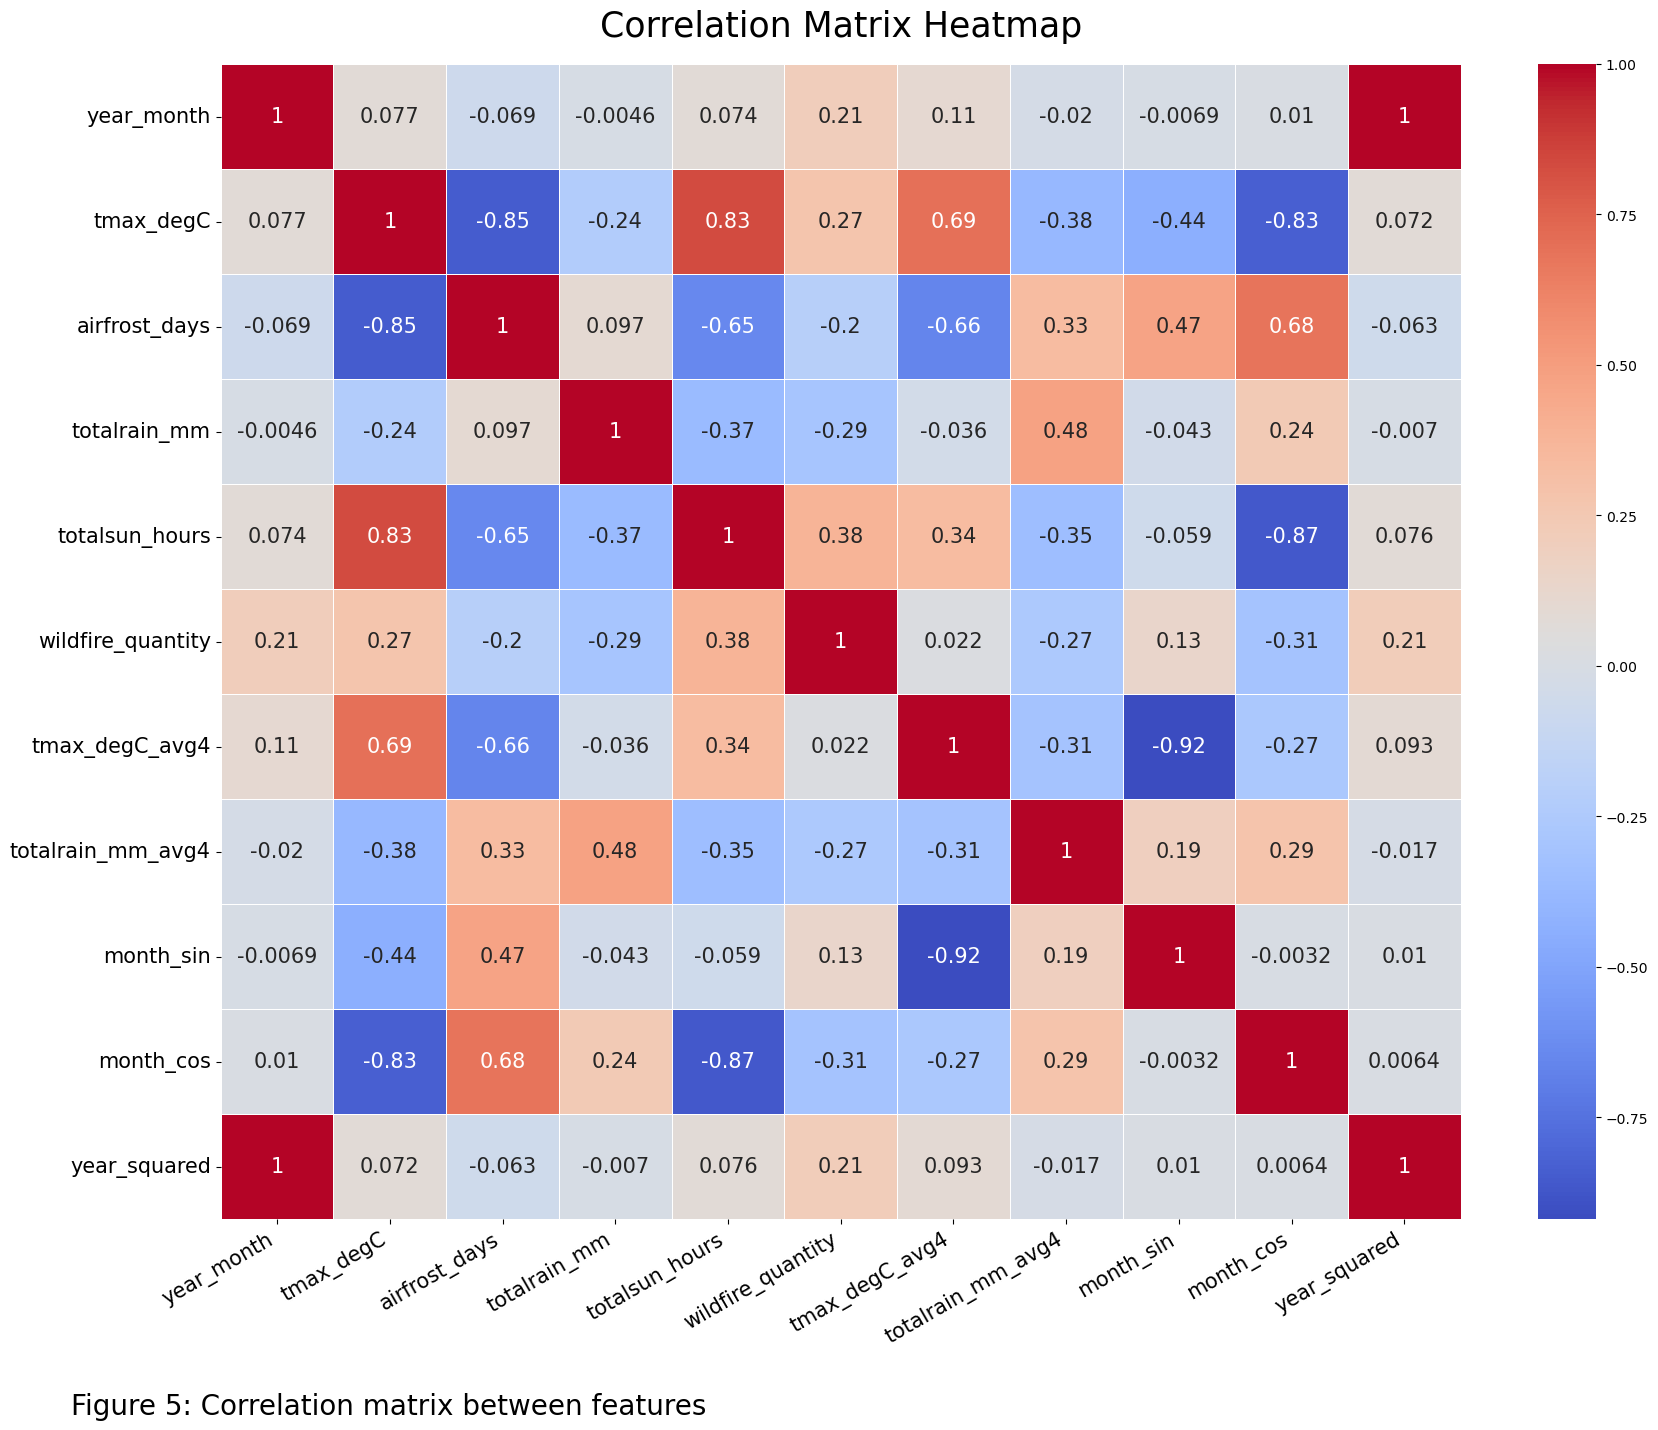

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_selected_features = ['year_month', 'tmax_degC', 'airfrost_days', 
                        'totalrain_mm', 'totalsun_hours', 'wildfire_quantity', 
                        'tmax_degC_avg4', 'totalrain_mm_avg4', 'month_sin', 'month_cos', 'year_squared']

# Calculate the correlation matrix for the specified columns
corr_matrix = df[df_selected_features].corr(method='spearman')

# Display the correlation matrix
#print(corr_matrix)

# Optional: Visualize the correlation matrix using a heatmap
# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 15})
plt.title('Correlation Matrix Heatmap', size=25, pad=20)

# Adjusting the x-tick labels
plt.xticks(size=15, ha='right', rotation=30)  # Slight rotation for readability
plt.yticks(size=15, rotation=0)

plt.figtext(0.05, -0.02, 'Figure 5: Correlation matrix between features', size=20)

plt.show()